# Import Libraries

In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Settings

In [3]:
pd.set_option('display.max_columns', None)
sns.set(style="white")

# Load Dataset

In [204]:
df = pd.read_csv("D:\\Pratham\\Loan_Default.csv")
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,not_neg,not_int,not_lpsm,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,not_neg,not_int,not_lpsm,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


# Initial Data Inspection

In [214]:
print(df.shape)

(148670, 34)


In [216]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [17]:
print(df.describe())

                  ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%       

In [23]:
print(df.head(10))

      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   
5  24895  2019         cf              Joint           pre     type1   
6  24896  2019         cf              Joint           pre     type1   
7  24897  2019        NaN             Female         nopre     type1   
8  24898  2019         cf              Joint         nopre     type1   
9  24899  2019         cf  Sex Not Available         nopre     type3   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  \
0           p1                l1        nopc                  nob/c   
1           p1                l1        nopc                    b

# Data Cleaning

## Remove duplicates if any

In [218]:
df.drop_duplicates(inplace=True)

## Handling missing values

In [220]:
missing_percent = df.isnull().mean() * 100
missing_cols = missing_percent[missing_percent > 0].sort_values(ascending=False)
print("Missing Values (%):\n", missing_cols)

Missing Values (%):
 Upfront_charges              26.664425
Interest_rate_spread         24.644515
rate_of_interest             24.509989
dtir1                        16.224524
property_value               10.155378
LTV                          10.155378
income                        6.154571
loan_limit                    2.249277
approv_in_adv                 0.610749
age                           0.134526
submission_of_application     0.134526
loan_purpose                  0.090133
Neg_ammortization             0.081388
term                          0.027578
dtype: float64


## Drop columns with >50% missing

In [222]:
to_drop = missing_cols[missing_cols > 50].index
df.drop(columns=to_drop, inplace=True)

## Impute numeric missing with median, categorical with mode

In [224]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

## Final check

In [226]:
print(df.isnull().sum().sum(), "missing values remaining.")

0 missing values remaining.


# Exploratory Data Analysis (EDA) and Advance Analysis

### 1. What are the column names of the dataset?

In [52]:
print("Columns:", df.columns.tolist())

Columns: ['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1']


### 2. What is the overall default rate?

In [131]:
default_rate = df['Status'].value_counts(normalize=True) * 100
print("LLoan Default Rate:\n", default_rate)

LLoan Default Rate:
 Status
0    75.355485
1    24.644515
Name: proportion, dtype: float64


### 3. What is the distribution of loan amounts?

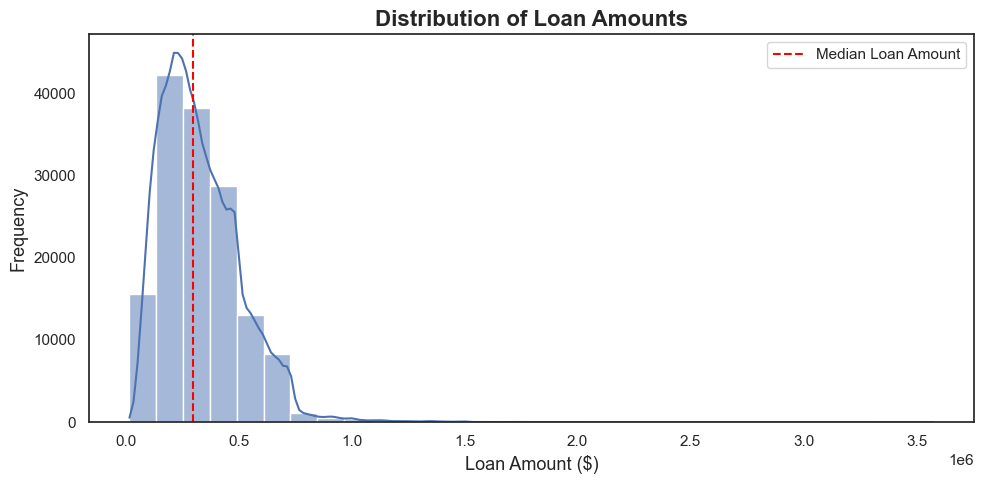

In [86]:
plt.figure(figsize=(10, 5))
sns.histplot(df['loan_amount'], kde=True, bins=30)
plt.title("Distribution of Loan Amounts", fontsize=16, fontweight='bold')
plt.xlabel("Loan Amount ($)", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
max_freq = df['loan_amount'].value_counts().max()
plt.axvline(df['loan_amount'].median(), color='red', linestyle='--', label='Median Loan Amount')
plt.legend()
plt.tight_layout()
plt.show()

### 4. What is the distribution of loan purposes?

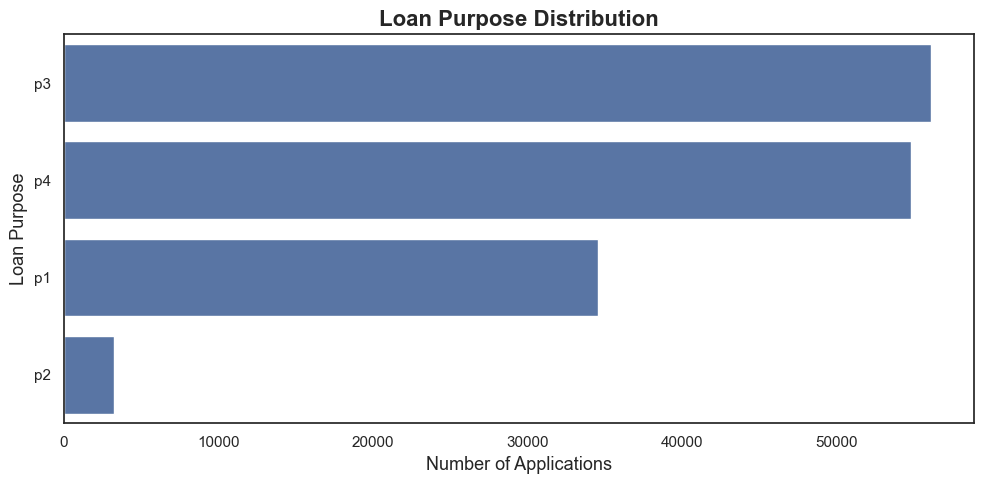

In [115]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='loan_purpose', order=df['loan_purpose'].value_counts().index)
plt.title("Loan Purpose Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Number of Applications", fontsize=13)
plt.ylabel("Loan Purpose", fontsize=13)
plt.tight_layout()
plt.show()

### 5. Correlation Heatmap (Only numerical features)

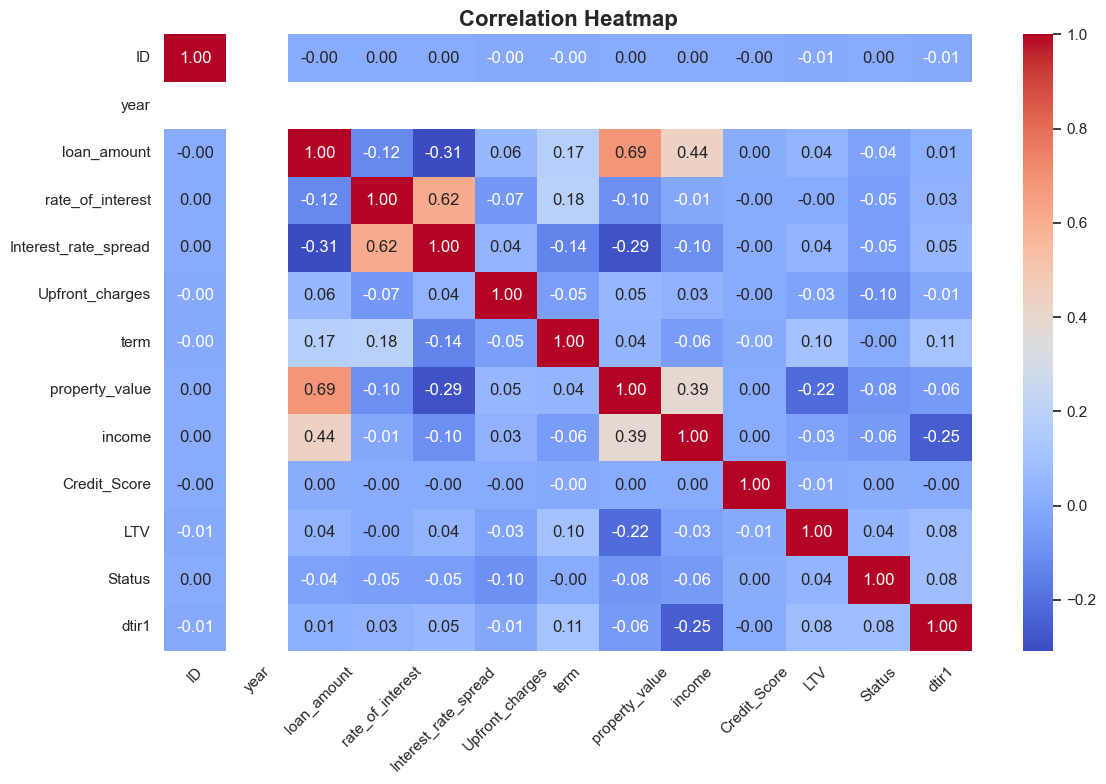

In [129]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 6. Plot default vs non-default

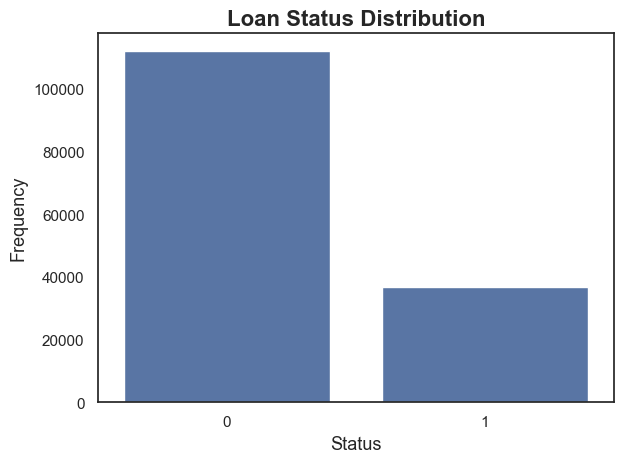

In [147]:
sns.countplot(x='Status', data=df)
plt.title("Loan Status Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Status", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.tight_layout()
plt.show()

### 7. Which purposes have the highest default rates?

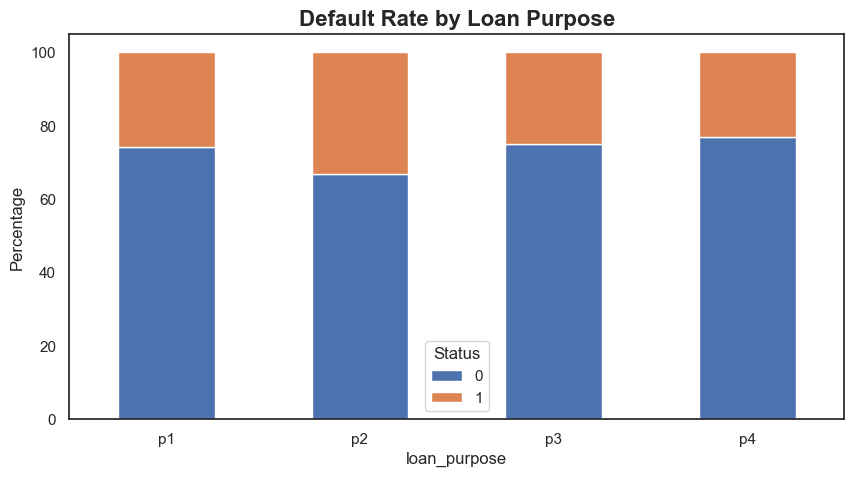

In [180]:
purpose_default = pd.crosstab(df['loan_purpose'], df['Status'], normalize='index') * 100
purpose_default.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Default Rate by Loan Purpose", fontsize=16, fontweight='bold')
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

### 8. Does annual income affect default rate?

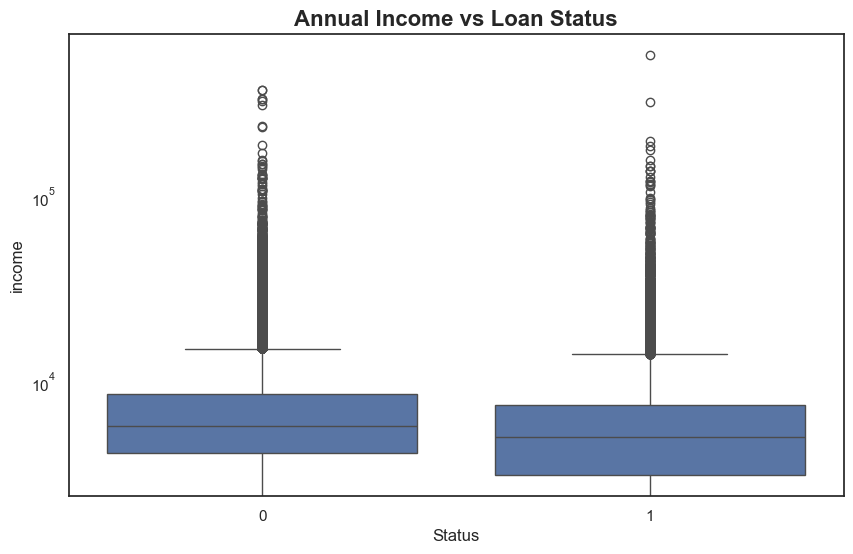

In [182]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='income', data=df)
plt.yscale("log")
plt.title("Annual Income vs Loan Status", fontsize=16, fontweight='bold')
plt.show()

### 9. What's the impact of loan term on default?

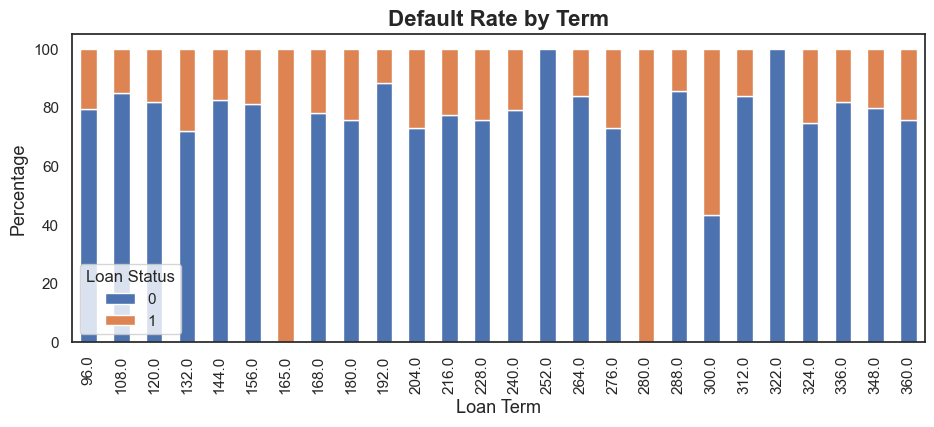

In [197]:
term_default = pd.crosstab(df['term'], df['Status'], normalize='index') * 100
term_default.plot(kind='bar', stacked=True, figsize=(11, 4))
plt.title("Default Rate by Term", fontsize=16, fontweight='bold')
plt.ylabel("Percentage", fontsize=13)
plt.xlabel("Loan Term", fontsize=13)
plt.legend(title="Loan Status")
plt.show()

### 10. How does loan amount compare across loan statuses?

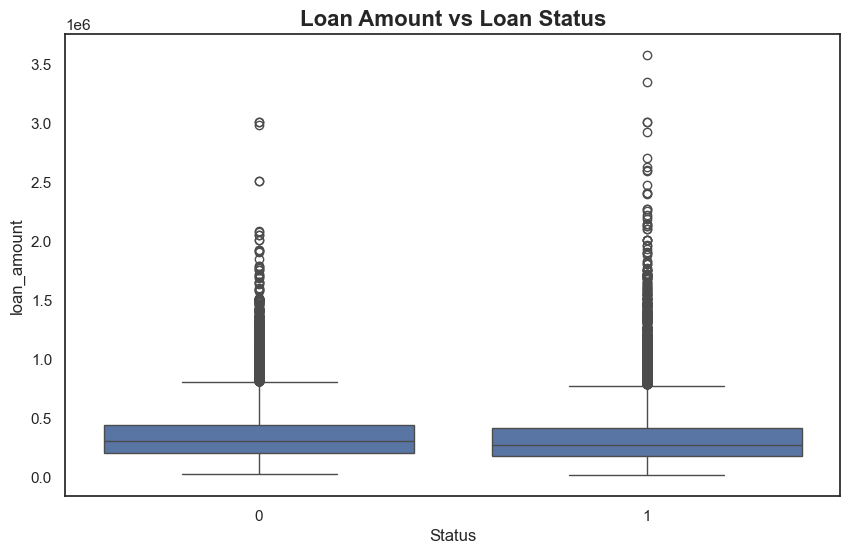

In [202]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Status', y='loan_amount')
plt.title("Loan Amount vs Loan Status", fontsize=16, fontweight='bold')
plt.show()

### 11. What are the unique values in each categorical column?

In [228]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}\n")

loan_limit: ['cf' 'ncf']

Gender: ['Sex Not Available' 'Male' 'Joint' 'Female']

approv_in_adv: ['nopre' 'pre']

loan_type: ['type1' 'type2' 'type3']

loan_purpose: ['p1' 'p4' 'p3' 'p2']

Credit_Worthiness: ['l1' 'l2']

open_credit: ['nopc' 'opc']

business_or_commercial: ['nob/c' 'b/c']

Neg_ammortization: ['not_neg' 'neg_amm']

interest_only: ['not_int' 'int_only']

lump_sum_payment: ['not_lpsm' 'lpsm']

construction_type: ['sb' 'mh']

occupancy_type: ['pr' 'sr' 'ir']

Secured_by: ['home' 'land']

total_units: ['1U' '2U' '3U' '4U']

credit_type: ['EXP' 'EQUI' 'CRIF' 'CIB']

co-applicant_credit_type: ['CIB' 'EXP']

age: ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']

submission_of_application: ['to_inst' 'not_inst']

Region: ['south' 'North' 'central' 'North-East']

Security_Type: ['direct' 'Indriect']



### 12. What is the average loan amount by gender?

In [233]:
print(df.groupby("Gender")["loan_amount"].mean())

Gender
Female               295861.475831
Joint                388587.248484
Male                 331420.889812
Sex Not Available    293126.304469
Name: loan_amount, dtype: float64


### 13. How many unique credit types are there and their counts?

In [236]:
print(df["credit_type"].value_counts())

credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64


### 14. Which columns have constant values (if any)?

In [242]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns:", constant_cols)

Constant columns: ['year']


### 15. Data type summary

In [244]:
print(df.dtypes.value_counts())

object     21
float64     8
int64       5
Name: count, dtype: int64


### 16. What is the maximum loan amount for each region?

In [248]:
print(df.groupby("Region")["loan_amount"].max())

Region
North         3576500
North-East    1276500
central       1916500
south         3346500
Name: loan_amount, dtype: int64


### 17. How many applicants are over 45 and took loans above 300k?

In [258]:
count = 0
for index, row in df.iterrows():
    if row["age"] in ["45-54", "55-64", "65-74", ">74"] and row["loan_amount"] > 300000:
        count += 1
print("Applicants over 45 with large loans:", count)

Applicants over 45 with large loans: 41940


### 18. Classify LTV into risk levels

In [331]:
def ltv_risk(ltv):
    if ltv >= 90:
        return "High Risk"
    elif ltv >= 70:
        return "Moderate Risk"
    else:
        return "Low Risk"

df['LTV_Risk'] = df['LTV'].apply(ltv_risk)
print(df['LTV_Risk'].value_counts())

LTV_Risk
Moderate Risk    71310
Low Risk         52401
High Risk        24959
Name: count, dtype: int64


### 19. Print IDs where DTIR is above 40 

In [267]:
i = 0
count = 0

while i < len(df):
    if not pd.isna(df.loc[i, "dtir1"]) and df.loc[i, "dtir1"] > 40:
        count += 1
    i += 1

print("Total records with DTIR > 40%:", count)

Total records with DTIR > 40%: 54718


### 20. How many loans were pre-approved and secured by property?

In [277]:
approved_secured = df[(df["approv_in_adv"] == "pre") & (df["Secured_by"] == "secured")]
print("Pre-approved & secured:", approved_secured.shape[0])

Pre-approved & secured: 0


### 21. What's the loan approval rate for each credit type?

In [279]:
approval_rates = df.groupby("credit_type")["Status"].mean()
print(approval_rates)

credit_type
CIB     0.158041
CRIF    0.162343
EQUI    0.999935
EXP     0.159854
Name: Status, dtype: float64


### 22. Average income for each age group

In [282]:
income_age = df.groupby("age")["income"].mean().sort_values(ascending=False)
print(income_age)

age
45-54    7834.365979
35-44    7580.120056
55-64    6842.262863
25-34    6507.464215
65-74    5430.376012
<25      4994.225879
>74      4815.947038
Name: income, dtype: float64


### 23. Classify credit score levels

In [287]:
def score_level(score):
    if score >= 750: return "Excellent"
    elif score >= 650: return "Good"
    elif score >= 550: return "Fair"
    else: return "Poor"
df["Credit_Score_Level"] = df["Credit_Score"].apply(score_level)
print(df["Credit_Score_Level"].value_counts())

Credit_Score_Level
Excellent    56029
Fair         37356
Good         36780
Poor         18505
Name: count, dtype: int64


### 24. Flag suspicious entries where LTV > 100

In [310]:
df["Suspicious_LTV"] = df["LTV"] > 100
print(df["Suspicious_LTV"].sum(), "entries flagged")

1799 entries flagged


### 25. What’s the max loan amount approved?

In [297]:
print("Max Loan Amount:", df['loan_amount'].max()) 

Max Loan Amount: 3576500


### 26. What percentage of loans are commercial vs personal?

In [304]:
commercial_pct = df['business_or_commercial'].value_counts(normalize=True) * 100
print("Commercial vs Personal Loans (%):\n", commercial_pct)

Commercial vs Personal Loans (%):
 business_or_commercial
nob/c    86.034842
b/c      13.965158
Name: proportion, dtype: float64


### 27. How many applicants applied with co-applicants?

In [306]:
count = df[df['co-applicant_credit_type'] != 'NA'].shape[0]
print("Applications with co-applicants:", count)

Applications with co-applicants: 148670


### 28. Loop through and print loan IDs where income > 100K

In [326]:
for index, row in df.iterrows():
    if row['income'] > 100000:
        print("High Income ID:", row['ID'])

High Income ID: 25945
High Income ID: 27293
High Income ID: 29211
High Income ID: 33782
High Income ID: 41899
High Income ID: 46124
High Income ID: 47259
High Income ID: 48006
High Income ID: 54641
High Income ID: 56427
High Income ID: 56564
High Income ID: 58511
High Income ID: 64486
High Income ID: 66491
High Income ID: 68044
High Income ID: 71032
High Income ID: 75987
High Income ID: 76463
High Income ID: 76624
High Income ID: 84908
High Income ID: 85886
High Income ID: 87127
High Income ID: 88929
High Income ID: 90241
High Income ID: 97488
High Income ID: 97741
High Income ID: 97881
High Income ID: 106218
High Income ID: 108473
High Income ID: 109830
High Income ID: 112628
High Income ID: 116456
High Income ID: 122420
High Income ID: 122471
High Income ID: 130903
High Income ID: 131761
High Income ID: 136475
High Income ID: 139449
High Income ID: 139727
High Income ID: 141519
High Income ID: 142138
High Income ID: 142197
High Income ID: 143221
High Income ID: 146530
High Income ID:

### 29. Are applicants with secured loans more creditworthy?

In [333]:
print(df.groupby('Secured_by')['Credit_Worthiness'].value_counts())

Secured_by  Credit_Worthiness
home        l1                   142314
            l2                     6323
land        l1                       30
            l2                        3
Name: count, dtype: int64


### 30. Check if lump sum payment is common in high income

In [336]:
high_income = df[df['income'] > df['income'].mean()]
print("Lump sum % in high income:", high_income['lump_sum_payment'].value_counts(normalize=True) * 100)

Lump sum % in high income: lump_sum_payment
not_lpsm    97.826291
lpsm         2.173709
Name: proportion, dtype: float64
